# Transferir datos de unidades  espaciales no anidadas

Para esta clase utilzaremos dos cartografías con unidades espaciales no superpuestas para trasnferir datos de unas a otras utilizando el porcentaje de superposición como ponderador.

Utilizaremos para ello el operador espacial `union`. Para más información sobre operadores espaciales pueden cheque la documentación de [Geopandas](http://geopandas.org/set_operations.html) o [Shapely](https://shapely.readthedocs.io/en/stable/manual.html#object.union)

In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

mismos crs?: True


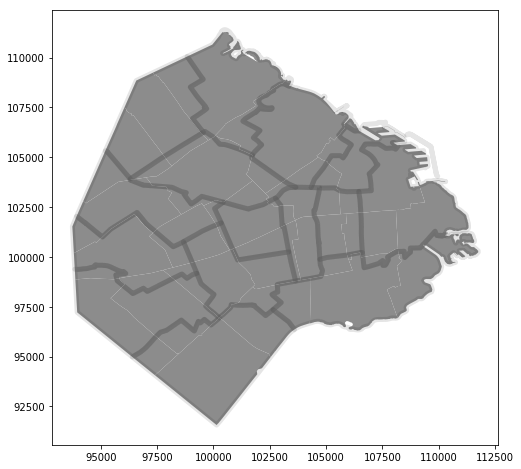

In [2]:
#leer la cartografía de comunas
com = gpd.read_file('../carto/clase_4/comunas-rar/comunas.shp')

#leer los datos de distritos escolares
dis = gpd.read_file('../carto/clase_4/distritos-escolares-rar/distritos_escolares.shp')

#chequear que tengan la misma proyeccion
print('mismos crs?:',dis.crs==com.crs)

#hacer un plot para observar la cartografia
fig,ax = plt.subplots(1,figsize=(8,8)) 
dis.plot(ax=ax,facecolor='grey',alpha=1)
com.plot(ax=ax,facecolor='white',edgecolor = 'black',alpha=0.1,linewidth=5);

## Data ejemplo

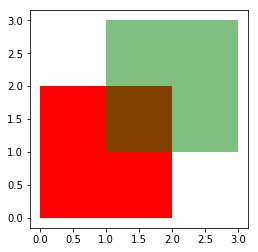

In [3]:
from shapely.geometry import Polygon, Point, LineString

polys1 = gpd.GeoSeries([Polygon([(0,0), (2,0), (2,2), (0,2)])])

polys2 = gpd.GeoSeries([Polygon([(1,1), (3,1), (3,3), (1,3)])])


df1 = gpd.GeoDataFrame({'geometry': polys1, 'letra':['A']})
df2 = gpd.GeoDataFrame({'geometry': polys2, 'letra':['B']})

ax = df1.plot(color='red');

df2.plot(ax=ax, color='green', alpha=0.5);

In [4]:
unido = gpd.overlay(df1, df2, how='union')
unido

,letra,letra_2,geometry
0,A,None,"POLYGON ((2 1, 2 0, 0 0, 0 2, 1 2, 1 1, 2 1))"
1,None,B,"POLYGON ((2 1, 2 2, 1 2, 1 3, 3 3, 3 1, 2 1))"
2,A,B,"POLYGON ((1 2, 2 2, 2 1, 1 1, 1 2))"


In [5]:
unido = unido.fillna('')
unido['union'] = unido.letra + unido.letra_2
unido

,letra,letra_2,geometry,union
0,A,,"POLYGON ((2 1, 2 0, 0 0, 0 2, 1 2, 1 1, 2 1))",A
1,,B,"POLYGON ((2 1, 2 2, 1 2, 1 3, 3 3, 3 1, 2 1))",B
2,A,B,"POLYGON ((1 2, 2 2, 2 1, 1 1, 1 2))",AB


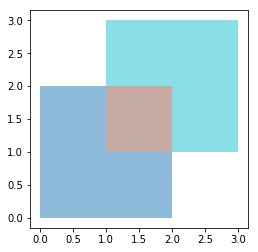

In [6]:
unido.plot(column='union',alpha=0.5)

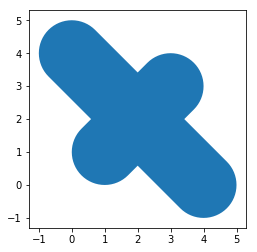

In [7]:
BC = pd.DataFrame({'letra':['C','D'],'geometry':[LineString([Point(0,4),Point(4,0)]),LineString([Point(1,1),Point(3,3)])]})
BC = gpd.GeoDataFrame(BC,geometry='geometry')
BC.geometry = BC.geometry.buffer(1)
BC.plot()

In [8]:
unido2 = gpd.overlay(unido,BC,how='union')
unido2 = unido2.fillna('')
unido2

,letra,letra_2,union,letra_3,geometry
0,,,,C,"POLYGON ((3.414213562373095 2, 4.7071067811865..."
1,,,,D,"POLYGON ((2 3.414213562373095, 2.2928932188134..."
2,A,,A,C,"POLYGON ((2 1, 2 0.5857864376269052, 1.5857864..."
3,,,,C,"POLYGON ((2 0.5857864376269052, 2 1, 2.4142135..."
4,A,,A,,"POLYGON ((2 0.5857864376269052, 2 0, 0.9999999..."
5,A,,A,,"POLYGON ((0.9999999999999994 0, 0 0, 0 0.99999..."
6,A,,A,,"POLYGON ((0 0.9999999999999981, 0 2, 0.5857864..."
7,A,,A,C,"POLYGON ((0.585786437626905 2, 1 2, 1 1.585786..."
8,,,,C,"POLYGON ((1 2, 0.585786437626905 2, 1 2.414213..."
9,A,B,AB,C,"POLYGON ((1 1.585786437626905, 1 2, 2 2, 2 1, ..."


In [9]:
unido2['union'] = unido2.letra + unido2.letra_2 + unido2.letra_3
unido2

,letra,letra_2,union,letra_3,geometry
0,,,C,C,"POLYGON ((3.414213562373095 2, 4.7071067811865..."
1,,,D,D,"POLYGON ((2 3.414213562373095, 2.2928932188134..."
2,A,,AC,C,"POLYGON ((2 1, 2 0.5857864376269052, 1.5857864..."
3,,,C,C,"POLYGON ((2 0.5857864376269052, 2 1, 2.4142135..."
4,A,,A,,"POLYGON ((2 0.5857864376269052, 2 0, 0.9999999..."
5,A,,A,,"POLYGON ((0.9999999999999994 0, 0 0, 0 0.99999..."
6,A,,A,,"POLYGON ((0 0.9999999999999981, 0 2, 0.5857864..."
7,A,,AC,C,"POLYGON ((0.585786437626905 2, 1 2, 1 1.585786..."
8,,,C,C,"POLYGON ((1 2, 0.585786437626905 2, 1 2.414213..."
9,A,B,ABC,C,"POLYGON ((1 1.585786437626905, 1 2, 2 2, 2 1, ..."


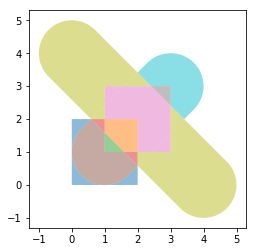

In [10]:
unido2.plot(column='union',alpha=0.5)

## Datos reales

In [11]:
#seleccionar columnas de interes, cambiarle los nombres y el formato 
com = com.reindex(columns=['COMUNAS','AREA','geometry'])
com.columns = ['COMUNA','AREA_COMUNA','geometry']
com.COMUNA = com.COMUNA.map(lambda x: str(int(x)))
com.head(2)

,COMUNA,AREA_COMUNA,geometry
0,2,6.140873e+06,"POLYGON ((107643.4579999996 106569.2989999996,..."
1,5,6.660526e+06,"POLYGON ((104625.1425999999 101679.9345000004,..."


In [12]:
#obtener los datos de promedio ponderado de NBI por comuna
nbi = pd.read_csv('../data/nbi_x_comuna.csv')
nbi.COMUNA = nbi.COMUNA.map(str)
nbi.head()

,COMUNA,NBI_prom
0,1,15.903845
1,4,12.658427
2,3,11.877399
3,8,11.308501
4,7,8.639839


In [13]:
#pasar los datos a la cartografía de las comunas y chequear si hay datos faltantes
# com = pd.merge(com,nbi, on='COMUNA',how='inner')
com = com.merge(nbi,on = 'COMUNA',how='inner')
print('Comunas sin datos:',com.NBI_prom.isnull().sum())
com.head()

Comunas sin datos: 0


,COMUNA,AREA_COMUNA,geometry,NBI_prom
0,2,6.140873e+06,"POLYGON ((107643.4579999996 106569.2989999996,...",2.035961
1,5,6.660526e+06,"POLYGON ((104625.1425999999 101679.9345000004,...",6.053666
2,6,6.851029e+06,"POLYGON ((102998.7598000001 102464.8016999997,...",2.202450
3,7,1.242290e+07,"POLYGON ((101036.6036 99947.2078999998, 101075...",8.639839
4,9,1.650531e+07,"POLYGON ((94869.34580000024 99583.6453999998, ...",4.150810


In [14]:
#seleccionar y renombrar columnas de los distritos escolars
dis = dis.reindex(columns=['ROMANO','AREA','geometry'])
dis.columns = ['DISTRITO','AREA_DISTRITO','geometry']
dis.head(2)

,DISTRITO,AREA_DISTRITO,geometry
0,II,6.527968e+06,"POLYGON ((105611.166100001 102698.1766999997, ..."
1,III,4.927409e+06,"POLYGON ((108108.8301999997 102223.8017000007,..."


In [15]:
#realizar la union y observar los datos
unidas = gpd.overlay(com,dis,how='union')
unidas.head()

,COMUNA,AREA_COMUNA,NBI_prom,DISTRITO,AREA_DISTRITO,geometry
0,None,NaN,NaN,XXI,1.368270e+07,"POLYGON ((101741.5488999998 93825.00480000023,..."
1,8,2.219261e+07,11.308501,XXI,1.368270e+07,"POLYGON ((101724.2218000004 93800.10759999976,..."
2,None,NaN,NaN,XXI,1.368270e+07,"POLYGON ((100400.8781000003 91908.84100000001,..."
3,8,2.219261e+07,11.308501,None,NaN,"POLYGON ((100145.2006999999 91566.41619999986,..."
4,8,2.219261e+07,11.308501,None,NaN,"POLYGON ((100130.7658000002 91579.54800000042,..."


### Caso ejemplo

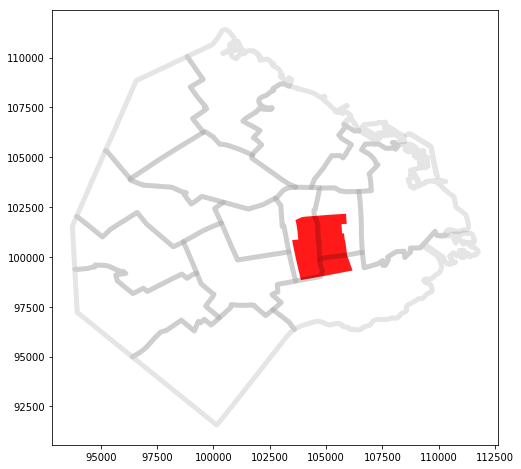

In [16]:
#tomemos un caso de ejemplo el distrito escolar 6
fig,ax = plt.subplots(1,figsize=(8,8)) 
dis.loc[dis.DISTRITO == 'VI'].plot(ax=ax,facecolor='red',alpha=1)
com.plot(ax=ax,facecolor='white',edgecolor = 'black',alpha=0.1,linewidth=5)

In [17]:
#crear un geodataframe del distrito 6
distrito6 = unidas.loc[unidas.DISTRITO == 'VI',:].copy()
#calcular el area de las unidades espaciales obtenidas
distrito6['area_union']=distrito6.geometry.area
distrito6

,COMUNA,AREA_COMUNA,NBI_prom,DISTRITO,AREA_DISTRITO,geometry,area_union
166,5,6.660526e+06,6.053666,VI,6.722145e+06,"POLYGON ((103992.3536 98860.43450000044, 10388...",3.101228e+06
172,4,2.170124e+07,12.658427,VI,6.722145e+06,"POLYGON ((104813.5255000014 99027.62980000023,...",1.099815e+06
1486,3,6.385991e+06,11.877399,VI,6.722145e+06,"POLYGON ((104604.1973000001 102065.7861000011,...",2.521101e+06
1498,3,6.385991e+06,11.877399,VI,6.722145e+06,"POLYGON ((105933.4473000001 100093.9813999999,...",1.219727e-19


Observamos que se superpone con las comunas 5, 3 y 4. Vemos atributos de los dataset originales, como el area del distrito y el area de la comuna. También hay una parte del distrito que no se superpone con ninguna comuna

In [21]:
#obtenemos los pesos o ponderadores como la proporción del area de las nuevas unidades espaciales 
#en realción al area de la unidad de interés, es decir los distritos 
distrito6['peso'] = distrito6.area_union/distrito6.AREA_DISTRITO
distrito6.head()

,COMUNA,AREA_COMUNA,NBI_prom,DISTRITO,AREA_DISTRITO,geometry,area_union,peso
166,5,6.660526e+06,6.053666,VI,6.722145e+06,"POLYGON ((103992.3536 98860.43450000044, 10388...",3.101228e+06,4.613451e-01
172,4,2.170124e+07,12.658427,VI,6.722145e+06,"POLYGON ((104813.5255000014 99027.62980000023,...",1.099815e+06,1.636108e-01
1486,3,6.385991e+06,11.877399,VI,6.722145e+06,"POLYGON ((104604.1973000001 102065.7861000011,...",2.521101e+06,3.750442e-01
1498,3,6.385991e+06,11.877399,VI,6.722145e+06,"POLYGON ((105933.4473000001 100093.9813999999,...",1.219727e-19,1.814491e-26


Vemos que la unidad espacial que no se superpone con ninguna Comuna tiene un peso despreciable. En teoría esto no debería suceder,pero puede ser que la cartografía no este perfectamente alineada y haya intersticios vacíos.

In [22]:
distrito6.loc[:,['COMUNA','NBI_prom','peso']]

,COMUNA,NBI_prom,peso
166,5,6.053666,4.613451e-01
172,4,12.658427,1.636108e-01
1486,3,11.877399,3.750442e-01
1498,3,11.877399,1.814491e-26


In [23]:
#chequear que los pesos den 1
distrito6.peso.sum()

1.000000000000084

In [24]:
#eliminar los distritos sin comunas
distrito6 = distrito6.dropna()

In [25]:
#obtener un NBI del distrito
sum(distrito6.NBI_prom * distrito6.peso)

9.318433018398586

In [26]:
#al ver los datos originales, se observa que el nbi debía estar en algun valor entre el del NBI de las comunas 5 y 3 
# que son las que tenían mayores pesos
com.loc[com.COMUNA.isin(['4','3','5']),['COMUNA','NBI_prom']]

,COMUNA,NBI_prom
1,5,6.053666
9,3,11.877399
12,4,12.658427


### Aplicación a todos los datos

In [30]:
#calcular el area de todas las unidades nuevas 
unidas['area_union'] = unidas.geometry.area
#calcular los pesos
unidas['peso'] = unidas.area_union / unidas.AREA_DISTRITO

unidas.head(10)

,COMUNA,AREA_COMUNA,NBI_prom,DISTRITO,AREA_DISTRITO,geometry,area_union,peso
0,None,NaN,NaN,XXI,1.368270e+07,"POLYGON ((101741.5488999998 93825.00480000023,...",8.431228e-04,6.161964e-11
1,8,2.219261e+07,11.308501,XXI,1.368270e+07,"POLYGON ((101724.2218000004 93800.10759999976,...",1.368175e+07,9.999310e-01
2,None,NaN,NaN,XXI,1.368270e+07,"POLYGON ((100400.8781000003 91908.84100000001,...",3.617614e+02,2.643934e-05
3,8,2.219261e+07,11.308501,None,NaN,"POLYGON ((100145.2006999999 91566.41619999986,...",8.400255e+01,NaN
4,8,2.219261e+07,11.308501,None,NaN,"POLYGON ((100130.7658000002 91579.54800000042,...",2.057726e-04,NaN
5,8,2.219261e+07,11.308501,None,NaN,"POLYGON ((101947.2166096804 94114.896114141, 1...",2.504901e+04,NaN
6,None,NaN,NaN,XXI,1.368270e+07,"POLYGON ((101947.2166096804 94114.896114141, 1...",1.834643e+02,1.340849e-05
7,8,2.219261e+07,11.308501,XX,8.991029e+06,"POLYGON ((97443.02740000002 94095.15309999976,...",1.887832e+06,2.099684e-01
8,8,2.219261e+07,11.308501,XIX,9.409782e+06,"POLYGON ((101234.2352 96031.94170000032, 10122...",4.656396e+06,4.948463e-01
9,8,2.219261e+07,11.308501,XXI,1.368270e+07,"POLYGON ((102571.3877821674 95021.49250896128,...",8.425616e-11,6.157862e-18


In [28]:
#explorar los pesos de las areas que no tienen comuna: todos son muy pequeños cercanos a 0
unidas.loc[(unidas.COMUNA.isnull()),'peso'].describe()

count    8.420000e+02
mean     1.123591e-05
std      7.349335e-05
min      5.692180e-27
25%      1.638653e-17
50%      1.057467e-16
75%      1.367761e-14
max      1.117900e-03
Name: peso, dtype: float64

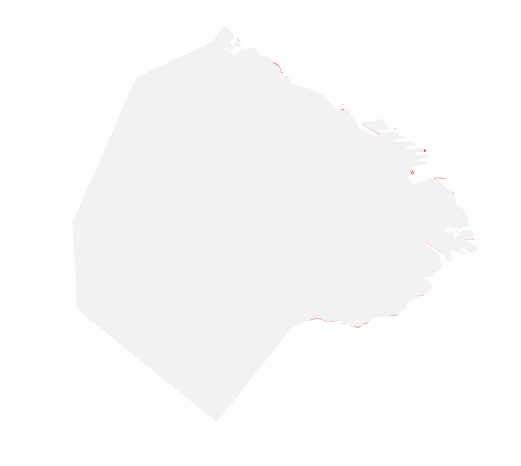

In [31]:
#vemos donde estan los null en comuna: en los márgenes
f,ax = plt.subplots(1,figsize=(8,8))
unidas.loc[(unidas.COMUNA.isnull()) & (unidas.area_union > 1000),:].plot(color = 'red',ax=ax)
com.plot(ax=ax,color='grey',alpha=0.1)
ax.set_axis_off()

In [32]:
#eliminar las zonas sin comuna ya que no inciden en el analisis
unidas = unidas.loc[unidas.COMUNA.notnull(),:]

In [33]:
#crar una función que multiplique el vector del valor de NBI por el vector del peso de ese registro y lo sume
def prom_pondera(fila):
    return sum(fila.NBI_prom * fila.peso)

In [34]:
tabla = unidas.reindex(columns=['DISTRITO','NBI_prom','peso']).groupby('DISTRITO').agg(prom_pondera)
tabla = tabla.reindex(columns = ['NBI_prom'])
tabla = tabla.reset_index()
tabla.head()

,DISTRITO,NBI_prom
0,I,9.627371
1,II,5.119554
2,III,14.632114
3,IV,14.239917
4,IX,0.275086


In [35]:
dis.shape

(21, 3)

In [36]:
tabla.shape

(21, 2)

In [37]:
# Realizar un merge para pasar los datos a la cartografía de distritos
# cuando los nombres de la columna que une son iguales y ambas tablas tienen la misma cantidad de registros
#el merge es muy sencilo:
dis = dis.merge(tabla)

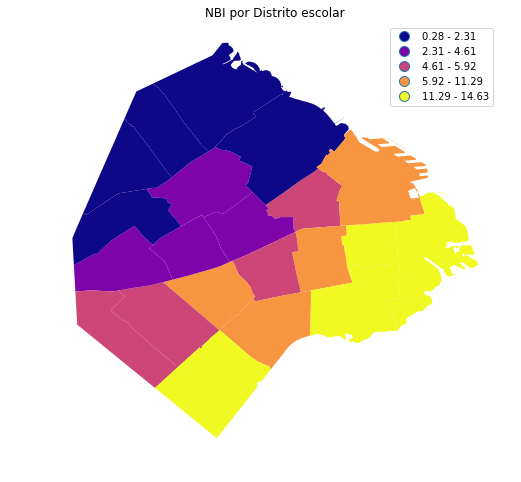

In [40]:
f,ax = plt.subplots(1,figsize=(8,8))
dis.plot(ax=ax,column='NBI_prom',legend=True,scheme='Quantiles',k=5,cmap='plasma')
ax.set_axis_off()
ax.set_title('NBI por Distrito escolar');

In [41]:
#podemos crear los campos que identifiquen la union con un nombre
unidas = unidas.fillna('')
unidas['union'] = unidas.COMUNA + ' - ' + unidas.DISTRITO
unidas.head(30)

,COMUNA,AREA_COMUNA,NBI_prom,DISTRITO,AREA_DISTRITO,geometry,area_union,peso,union
1,8,2.219261e+07,11.308501,XXI,1.36827e+07,"POLYGON ((101724.2218000004 93800.10759999976,...",1.368175e+07,0.999931,8 - XXI
3,8,2.219261e+07,11.308501,,,"POLYGON ((100145.2006999999 91566.41619999986,...",8.400255e+01,,8 -
4,8,2.219261e+07,11.308501,,,"POLYGON ((100130.7658000002 91579.54800000042,...",2.057726e-04,,8 -
5,8,2.219261e+07,11.308501,,,"POLYGON ((101947.2166096804 94114.896114141, 1...",2.504901e+04,,8 -
7,8,2.219261e+07,11.308501,XX,8.99103e+06,"POLYGON ((97443.02740000002 94095.15309999976,...",1.887832e+06,0.209968,8 - XX
8,8,2.219261e+07,11.308501,XIX,9.40978e+06,"POLYGON ((101234.2352 96031.94170000032, 10122...",4.656396e+06,0.494846,8 - XIX
9,8,2.219261e+07,11.308501,XXI,1.36827e+07,"POLYGON ((102571.3877821674 95021.49250896128,...",8.425616e-11,6.15786e-18,8 - XXI
12,8,2.219261e+07,11.308501,XIII,1.05499e+07,"POLYGON ((98519.24419999961 95200.31730000023,...",1.965086e+06,0.186266,8 - XIII
14,8,2.219261e+07,11.308501,,,"POLYGON ((103489.8285348648 96272.55044685876,...",1.840871e-03,,8 -
15,8,2.219261e+07,11.308501,,,"POLYGON ((103244.6775000002 95985.9785000002, ...",9.755326e-04,,8 -
